Transforming training set words to features with TF-IDF values

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
import numpy as np

df=pd.read_csv('training.csv')

# cleanup_nums = {"topic": {"IRRELEVANT": 0, "ARTS CULTURE ENTERTAINMENT": 1, "BIOGRAPHIES PERSONALITIES PEOPLE": 2, "DEFENCE": 3, "DOMESTIC MARKETS": 4,
#                                   "FOREX MARKETS": 5, "HEALTH": 6, "MONEY MARKETS": 7, "SCIENCE AND TECHNOLOGY": 8, "SHARE LISTINGS": 9, "SPORTS":10 }}


# df.replace(cleanup_nums, inplace=True)

vectorizer = TfidfVectorizer()

#give each word a tf-idf value
train_features = vectorizer.fit_transform(df['article_words'])

print(train_features.shape)

y_train = df['topic']

print(y_train)


(9500, 35822)
0       FOREX MARKETS
1       MONEY MARKETS
2              SPORTS
3       FOREX MARKETS
4          IRRELEVANT
            ...      
9495          DEFENCE
9496       IRRELEVANT
9497    FOREX MARKETS
9498       IRRELEVANT
9499    FOREX MARKETS
Name: topic, Length: 9500, dtype: object


Transforming test set words to features with TF-IDF values

In [2]:
df_test=pd.read_csv('test.csv')

# cleanup_nums = {"topic": {"IRRELEVANT": 0, "ARTS CULTURE ENTERTAINMENT": 1, "BIOGRAPHIES PERSONALITIES PEOPLE": 2, "DEFENCE": 3, "DOMESTIC MARKETS": 4,
#                                   "FOREX MARKETS": 5, "HEALTH": 6, "MONEY MARKETS": 7, "SCIENCE AND TECHNOLOGY": 8, "SHARE LISTINGS": 9, "SPORTS":10 }}


# df_test.replace(cleanup_nums, inplace=True)

#give each word a tf-idf value
test_features = vectorizer.transform(df_test['article_words'])

print(test_features.shape)

y_test = df_test['topic']

print(y_test)

(500, 35822)
0          IRRELEVANT
1          IRRELEVANT
2       FOREX MARKETS
3          IRRELEVANT
4          IRRELEVANT
            ...      
495        IRRELEVANT
496            SPORTS
497     MONEY MARKETS
498    SHARE LISTINGS
499        IRRELEVANT
Name: topic, Length: 500, dtype: object


Run ML algos

Naive Bayes Rule

In [24]:
# #naive bayes rule

# from sklearn.naive_bayes import MultinomialNB
# NBclf = MultinomialNB()

# NBclf.fit(train_features, y_train)

# #gets the NB topic predicitions of the test data
# NBpredictions = NBclf.predict(test_features)

# np.mean(NBpredictions == y_test)

# #tuning

# # from sklearn.model_selection import GridSearchCV
# # gs_clf = GridSearchCV(NBclf, parameters, n_jobs=-1)
# # gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)



0.68

Random Forest

In [5]:
# from sklearn.ensemble import RandomForestClassifier

# RFclf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')


# RFclf.fit(train_features, y_train)

# # Use the forest's predict method on the test data
# RFpredictions = RFclf.predict(test_features)

# np.mean(RFpredictions == y_test)


0.738

SVM

In [6]:
# from sklearn.svm import SVC

# SVM_clf = SVC(kernel='linear')
# SVM_clf.fit(train_features, y_train)
# SVMpredictions = SVM_clf.predict(test_features)


# print("hello")
# np.mean(SVMpredictions == y_test)




hello


0.768

In [143]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression

# LGR_clf = LogisticRegression(random_state=0)
# LGR_clf.fit(train_features, y_train)
# LGR_prediction = LGR_clf.predict(test_features)

# np.mean(LGR_prediction == y_test)

In [17]:
import numpy as np
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV

SGD_clf = linear_model.SGDClassifier(tol=1e-2, shuffle=False, learning_rate='constant', eta0=1)
SGD_clf.fit(train_features, y_train)
SGD_prediction = SGD_clf.predict(test_features)

np.mean(SGD_prediction == y_test)

print(SGD_prediction)



['IRRELEVANT' 'IRRELEVANT' 'FOREX MARKETS' 'IRRELEVANT' 'IRRELEVANT'
 'FOREX MARKETS' 'IRRELEVANT' 'SPORTS' 'IRRELEVANT' 'IRRELEVANT'
 'IRRELEVANT' 'IRRELEVANT' 'SPORTS' 'SPORTS' 'IRRELEVANT' 'MONEY MARKETS'
 'IRRELEVANT' 'SHARE LISTINGS' 'IRRELEVANT' 'SPORTS' 'IRRELEVANT'
 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT' 'FOREX MARKETS'
 'ARTS CULTURE ENTERTAINMENT' 'IRRELEVANT' 'IRRELEVANT' 'FOREX MARKETS'
 'FOREX MARKETS' 'MONEY MARKETS' 'IRRELEVANT' 'IRRELEVANT' 'MONEY MARKETS'
 'IRRELEVANT' 'SPORTS' 'IRRELEVANT' 'IRRELEVANT' 'FOREX MARKETS'
 'IRRELEVANT' 'SPORTS' 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT'
 'IRRELEVANT' 'IRRELEVANT' 'MONEY MARKETS' 'IRRELEVANT' 'MONEY MARKETS'
 'FOREX MARKETS' 'IRRELEVANT' 'IRRELEVANT' 'FOREX MARKETS' 'MONEY MARKETS'
 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT' 'DEFENCE' 'MONEY MARKETS'
 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT' 'IRRELEVANT' 'MONEY MARKETS'
 'IRRELEVANT' 'IRRELEVANT' 'SPORTS' 'SPORTS' 'FOREX MARKETS'
 'MONEY MARKETS' 'IRRELEVANT' 'SPORTS' '

In [18]:
clf_sigmoid = CalibratedClassifierCV(SGD_clf, cv='prefit', method='sigmoid')
clf_sigmoid.fit(train_features, y_train)

target_names = ["ARTS CULTURE ENTERTAINMENT", "BIOGRAPHIES PERSONALITIES PEOPLE", "DEFENCE", "DOMESTIC MARKETS", "FOREX MARKETS", "HEALTH", "IRRELEVANT", "MONEY MARKETS", "SCIENCE AND TECHNOLOGY", "SHARE LISTINGS", "SPORTS"] 


pd.DataFrame(clf_sigmoid.predict_proba(test_features)*100, columns=target_names)

,ARTS CULTURE ENTERTAINMENT,BIOGRAPHIES PERSONALITIES PEOPLE,DEFENCE,DOMESTIC MARKETS,FOREX MARKETS,HEALTH,IRRELEVANT,MONEY MARKETS,SCIENCE AND TECHNOLOGY,SHARE LISTINGS,SPORTS
0,0.093620,0.033603,0.058913,0.173214,0.997620,0.018953,85.437281,2.248963,0.178011,10.670874,0.088947
1,0.647307,1.366583,0.059379,0.105653,0.663601,0.086432,88.719436,7.541555,0.158454,0.082616,0.568984
2,0.117404,0.002549,0.005292,0.004464,42.896320,0.003790,38.331456,18.622325,0.001191,0.008135,0.007075
3,0.074109,0.122362,0.075923,0.197367,1.523439,0.299692,94.893835,2.723278,0.058017,0.011842,0.020137
4,0.058172,0.035008,0.011551,0.012002,7.881767,0.009248,90.953767,0.980968,0.004448,0.047455,0.005613
...,...,...,...,...,...,...,...,...,...,...,...
495,1.043038,0.030434,0.262995,0.131535,1.789098,0.058982,94.009779,2.397594,0.027380,0.220013,0.029151
496,0.034476,0.271029,0.052984,0.073905,0.923206,0.027916,0.774257,2.114824,0.045494,0.020376,95.661534
497,0.036214,0.035079,0.002686,0.004856,4.369922,0.002857,3.048495,92.491412,0.002019,0.000244,0.006216
498,0.027794,0.173190,0.030107,0.100686,1.630139,0.032084,84.270462,3.474938,0.043867,10.139430,0.077304


Classification report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, SGD_prediction, target_names=target_names))

                                  precision    recall  f1-score   support

      ARTS CULTURE ENTERTAINMENT       0.33      0.67      0.44         3
BIOGRAPHIES PERSONALITIES PEOPLE       1.00      0.20      0.33        15
                         DEFENCE       0.89      0.62      0.73        13
                DOMESTIC MARKETS       0.50      0.50      0.50         2
                   FOREX MARKETS       0.58      0.54      0.56        48
                          HEALTH       0.75      0.64      0.69        14
                      IRRELEVANT       0.84      0.92      0.88       266
                   MONEY MARKETS       0.63      0.61      0.62        69
          SCIENCE AND TECHNOLOGY       0.00      0.00      0.00         3
                  SHARE LISTINGS       0.67      0.29      0.40         7
                          SPORTS       0.95      0.97      0.96        60

                        accuracy                           0.79       500
                       macro avg    

--------------------BELOW IS NOT SUPER NEEDED DELETE LATER-------------------------

SGD Classifier

In [4]:
df2 = pd.read_csv("training.csv")
df2.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [5]:
df2['topic'].unique()

array(['FOREX MARKETS', 'MONEY MARKETS', 'SPORTS', 'IRRELEVANT',
       'SHARE LISTINGS', 'BIOGRAPHIES PERSONALITIES PEOPLE',
       'DOMESTIC MARKETS', 'DEFENCE', 'SCIENCE AND TECHNOLOGY', 'HEALTH',
       'ARTS CULTURE ENTERTAINMENT'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   article_number  9500 non-null   int64 
 1   article_words   9500 non-null   object
 2   topic           9500 non-null   object
dtypes: int64(1), object(2)
memory usage: 296.9+ KB


<Figure size 720x432 with 0 Axes>

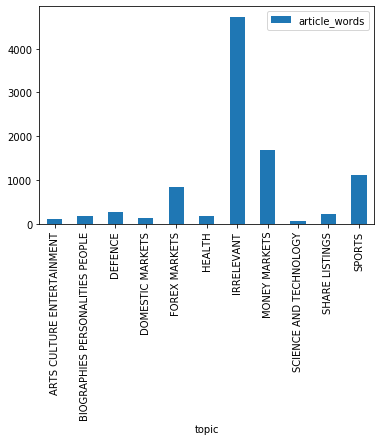

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df3 = df2[['topic','article_words']]
df3.groupby('topic').count().plot.bar(ylim=0)
plt.show()

In [14]:
# ADJUST LATER
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df3['topic']
text = df['article_words']

# ADJUST LATER
X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

print(labels.classes_)

['ARTS CULTURE ENTERTAINMENT' 'BIOGRAPHIES PERSONALITIES PEOPLE' 'DEFENCE'
 'DOMESTIC MARKETS' 'FOREX MARKETS' 'HEALTH' 'IRRELEVANT' 'MONEY MARKETS'
 'SCIENCE AND TECHNOLOGY' 'SHARE LISTINGS' 'SPORTS']


In [15]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

linear_svc = linear_model.SGDClassifier(max_iter=1500, tol=1e-3)
clf = linear_svc.fit(X_train_transformed,y_train_lables_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator=linear_svc,
                                        cv="prefit")

calibrated_svc.fit(X_train_transformed,y_train_lables_trf)
predicted = calibrated_svc.predict(X_test_transformed)

# Need to update
to_predict = ["I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements"]
p_count = count_vect.transform(to_predict)
p_tfidf = tf_transformer.transform(p_count)
print('Average accuracy on test set={}'.format(np.mean(predicted == labels.transform(y_test))))
print('Predicted probabilities of demo input string are')
print(calibrated_svc.predict_proba(p_tfidf))

Average accuracy on test set=0.7712280701754386
Predicted probabilities of demo input string are
[[1.72381463e-03 1.68180265e-03 1.61864045e-03 9.25634263e-04
  1.62330761e-02 3.73257049e-04 9.58818933e-01 1.66948877e-02
  5.25338442e-04 1.51605858e-04 1.25300946e-03]]


In [16]:
pd.DataFrame(calibrated_svc.predict_proba(p_tfidf)*100, columns=labels.classes_)

,ARTS CULTURE ENTERTAINMENT,BIOGRAPHIES PERSONALITIES PEOPLE,DEFENCE,DOMESTIC MARKETS,FOREX MARKETS,HEALTH,IRRELEVANT,MONEY MARKETS,SCIENCE AND TECHNOLOGY,SHARE LISTINGS,SPORTS
0,0.172381,0.16818,0.161864,0.092563,1.623308,0.037326,95.881893,1.669489,0.052534,0.015161,0.125301


In [8]:
print(y_test)

0          IRRELEVANT
1          IRRELEVANT
2       FOREX MARKETS
3          IRRELEVANT
4          IRRELEVANT
            ...      
495        IRRELEVANT
496            SPORTS
497     MONEY MARKETS
498    SHARE LISTINGS
499        IRRELEVANT
Name: topic, Length: 500, dtype: object
